<a href="https://colab.research.google.com/github/Andhi1710/python/blob/main/(Andhi_Hamzah)_McDonald's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work with your data!

a) How many calories does the
average McDonald's value
meal contain?

b) How much do beverages,
like soda or coffee,
contribute to the overall
caloric intake?

c) Does ordered grilled chicken
instead of crispy increase a
sandwich's nutritional
value?

d) What about ordering egg
whites instead of whole
eggs?

e) What is the least number of
items could you order from
the menu to meet one day's
nutritional requirements?

# Data Import

In [1]:
#memasukkan data 
#jika dari colab langsung hapus path sampai colab notebook 
import pandas as pd
import numpy as np
path = ("/content/drive/My Drive/Colab Notebooks/menu.csv")
df = pd.read_csv(path)
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [2]:
#melihat statistik deskriptif
df.describe(include='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Double Quarter Pounder with Cheese,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [4]:
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [5]:
feature_numerik = [col for col in df.columns if df[col].dtype!='object'] 
feature_kategorik = [col for col in df.columns if df[col].dtype=='object']
print('feature numerik antara lain : ', feature_numerik)
print()
print('feature kategorik antara lain : ', feature_kategorik)

feature numerik antara lain :  ['Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

feature kategorik antara lain :  ['Category', 'Item', 'Serving Size']


# Data Preparation

In [6]:
#@title Dealing with missing values
missing_data = df.isnull()
missing_data.head(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Category
False    260
Name: Category, dtype: int64

Item
False    260
Name: Item, dtype: int64

Serving Size
False    260
Name: Serving Size, dtype: int64

Calories
False    260
Name: Calories, dtype: int64

Calories from Fat
False    260
Name: Calories from Fat, dtype: int64

Total Fat
False    260
Name: Total Fat, dtype: int64

Total Fat (% Daily Value)
False    260
Name: Total Fat (% Daily Value), dtype: int64

Saturated Fat
False    260
Name: Saturated Fat, dtype: int64

Saturated Fat (% Daily Value)
False    260
Name: Saturated Fat (% Daily Value), dtype: int64

Trans Fat
False    260
Name: Trans Fat, dtype: int64

Cholesterol
False    260
Name: Cholesterol, dtype: int64

Cholesterol (% Daily Value)
False    260
Name: Cholesterol (% Daily Value), dtype: int64

Sodium
False    260
Name: Sodium, dtype: int64

Sodium (% Daily Value)
False    260
Name: Sodium (% Daily Value), dtype: int64

Carbohydrates
False    260
Name: Carbohydrates, dtype: int64

Carbohydrates (% Daily Value)
Fals

In [8]:
df= pd.read_csv(path,nrows=10)
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,406.000000,196.000000,21.900000,33.80000,9.300000,47.000000,0.100000,153.500000,50.900000,1043.000000,43.500000,34.000000,11.300000,3.400000,14.100000,2.900000,19.500000,9.300000,3.400000,22.500000,13.800000
std,81.267733,60.037026,6.740425,10.49656,3.465705,16.911535,0.316228,122.837969,41.164845,279.962299,11.597414,5.333333,1.766981,0.843274,4.306326,0.737865,3.100179,4.547282,4.005552,5.892557,4.211096
min,250.000000,70.000000,8.000000,12.00000,3.000000,15.000000,0.000000,25.000000,8.000000,750.000000,31.000000,29.000000,10.000000,2.000000,7.000000,2.000000,14.000000,2.000000,0.000000,15.000000,8.000000
25%,377.500000,185.000000,20.750000,32.75000,8.000000,42.000000,0.000000,37.500000,12.000000,800.000000,33.750000,30.000000,10.000000,3.000000,12.000000,2.250000,18.250000,6.000000,0.000000,16.250000,10.000000
50%,420.000000,210.000000,23.000000,35.50000,9.500000,49.000000,0.000000,150.000000,49.500000,920.000000,38.500000,31.000000,10.000000,4.000000,17.000000,3.000000,19.500000,9.000000,1.000000,25.000000,15.000000
75%,457.500000,227.500000,25.750000,39.50000,11.750000,58.250000,0.000000,257.500000,86.000000,1300.000000,54.000000,37.500000,12.750000,4.000000,17.000000,3.000000,20.750000,13.750000,8.000000,25.000000,15.000000
max,520.000000,270.000000,30.000000,47.00000,14.000000,68.000000,1.000000,300.000000,100.000000,1420.000000,59.000000,43.000000,14.000000,4.000000,18.000000,4.000000,26.000000,15.000000,8.000000,30.000000,20.000000


In [9]:
kolum = ["Category","Item","Calories","Protein","Calcium (% Daily Value)","Iron (% Daily Value)"]
df= pd.read_csv(path, usecols=kolum)

In [10]:
df.describe()

,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000
mean,368.269231,13.338462,20.973077,7.734615
std,240.269886,11.426146,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000
25%,210.000000,4.000000,6.000000,0.000000
50%,340.000000,12.000000,20.000000,4.000000
75%,500.000000,19.000000,30.000000,15.000000
max,1880.000000,87.000000,70.000000,40.000000


In [11]:
df.dtypes

Category                   object
Item                       object
Calories                    int64
Protein                     int64
Calcium (% Daily Value)     int64
Iron (% Daily Value)        int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Category                 260 non-null    object
 1   Item                     260 non-null    object
 2   Calories                 260 non-null    int64 
 3   Protein                  260 non-null    int64 
 4   Calcium (% Daily Value)  260 non-null    int64 
 5   Iron (% Daily Value)     260 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 12.3+ KB


In [13]:
df.replace("?", np.nan, inplace = True)
df.head(30)

,Category,Item,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,300,17,25,15
1,Breakfast,Egg White Delight,250,18,25,8
2,Breakfast,Sausage McMuffin,370,14,25,10
3,Breakfast,Sausage McMuffin with Egg,450,21,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,400,21,25,10
5,Breakfast,Steak & Egg McMuffin,430,26,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",460,19,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,19,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",410,20,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",470,20,15,15


In [14]:
missing_data = df.isnull()
missing_data.head(30)

,Category,Item,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [15]:
#@title Data Normalisasi
df["Calories"] = df["Calories"].astype("float")
df["Protein"] = df["Protein"].astype("float")
df["Calcium (% Daily Value)"] = df["Calcium (% Daily Value)"].astype("float")
df["Iron (% Daily Value)"] = df["Iron (% Daily Value)"].astype("float")

In [16]:
df["Calories"] = df["Calories"]/df["Calories"].max()
df["Protein"] = df["Protein"]/df["Protein"].max()
df["Calcium (% Daily Value)"] = df["Calcium (% Daily Value)"]/df["Calcium (% Daily Value)"].max()
df["Iron (% Daily Value)"] = df["Iron (% Daily Value)"]/df["Iron (% Daily Value)"].max()

In [17]:
df.describe()

,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000
mean,0.195888,0.153316,0.299615,0.193365
std,0.127803,0.131335,0.243142,0.218082
min,0.000000,0.000000,0.000000,0.000000
25%,0.111702,0.045977,0.085714,0.000000
50%,0.180851,0.137931,0.285714,0.100000
75%,0.265957,0.218391,0.428571,0.375000
max,1.000000,1.000000,1.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Category                 260 non-null    object 
 1   Item                     260 non-null    object 
 2   Calories                 260 non-null    float64
 3   Protein                  260 non-null    float64
 4   Calcium (% Daily Value)  260 non-null    float64
 5   Iron (% Daily Value)     260 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.3+ KB


In [19]:
df["Calories"] = (df["Calories"]-df["Calories"].min())/(df["Calories"].max()-df["Calories"].min())
df["Protein"] = (df["Protein"]-df["Protein"].min())/(df["Protein"].max()-df["Protein"].min())
df["Calcium (% Daily Value)"] = (df["Calcium (% Daily Value)"]-df["Calcium (% Daily Value)"].min())/(df["Calcium (% Daily Value)"].max()-df["Calcium (% Daily Value)"].min())
df["Iron (% Daily Value)"] = (df["Iron (% Daily Value)"]-df["Iron (% Daily Value)"].min())/(df["Iron (% Daily Value)"].max()-df["Iron (% Daily Value)"].min())

In [20]:
df.describe()

,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000
mean,0.195888,0.153316,0.299615,0.193365
std,0.127803,0.131335,0.243142,0.218082
min,0.000000,0.000000,0.000000,0.000000
25%,0.111702,0.045977,0.085714,0.000000
50%,0.180851,0.137931,0.285714,0.100000
75%,0.265957,0.218391,0.428571,0.375000
max,1.000000,1.000000,1.000000,1.000000


In [21]:
df["Calories"] = (df["Calories"]-df["Calories"].mean())/df["Calories"].std()
df["Protein"] = (df["Protein"]-df["Protein"].mean())/df["Protein"].std()
df["Calcium (% Daily Value)"] = (df["Calcium (% Daily Value)"]-df["Calcium (% Daily Value)"].mean())/df["Calcium (% Daily Value)"].std()
df["Iron (% Daily Value)"] = (df["Iron (% Daily Value)"]-df["Iron (% Daily Value)"].mean())/df["Iron (% Daily Value)"].std()

In [22]:
df.describe()

,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value)
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02
mean,7.077672e-16,1.490261e-16,9.342954e-16,6.264220e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.532732e+00,-1.167363e+00,-1.232264e+00,-8.866654e-01
25%,-6.587144e-01,-8.172888e-01,-8.797367e-01,-8.866654e-01
50%,-1.176562e-01,-1.171402e-01,-5.717271e-02,-4.281214e-01
75%,5.482617e-01,4.954898e-01,5.303730e-01,8.328746e-01
max,6.291803e+00,6.446753e+00,2.880556e+00,3.698775e+00


In [23]:
#@title Binning
bins = np.linspace(min(df["Calories"]), max(df["Calories"]), 4)
bins

array([-1.53273153,  1.07544661,  3.68362476,  6.2918029 ])

In [24]:
group_names = ['Low', 'Medium', 'High']

In [25]:
df['Calories-binned'] = pd.cut(df['Calories'], bins, labels=group_names, include_lowest=True )
df[['Calories','Calories-binned']].head(261)

,Calories,Calories-binned
0,-0.284136,Low
1,-0.492235,Low
2,0.007203,Low
3,0.340162,Low
4,0.132063,Low
...,...,...
255,0.589882,Low
256,1.339039,Medium
257,-0.117656,Low
258,1.838477,Medium


# Exploratory Data Analysis

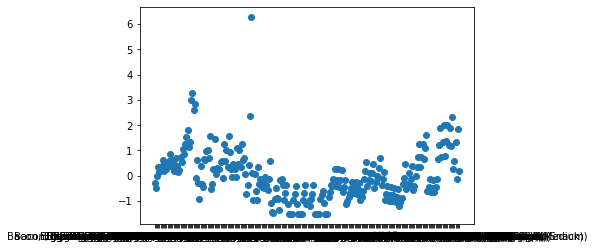

In [26]:
#@title Scatter Plot
import matplotlib.pyplot as plt
y=df["Calories"]
x=df["Item"]
plt.scatter(x,y)

(0.0, 6.8358963313264605)

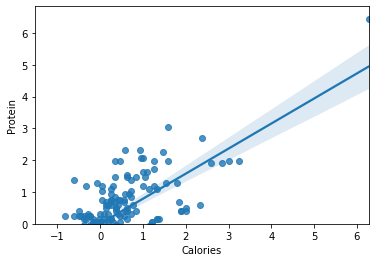

In [27]:
#@title Correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Calories", y="Protein", data=df)
plt.ylim(0,)

# Data Visualisation

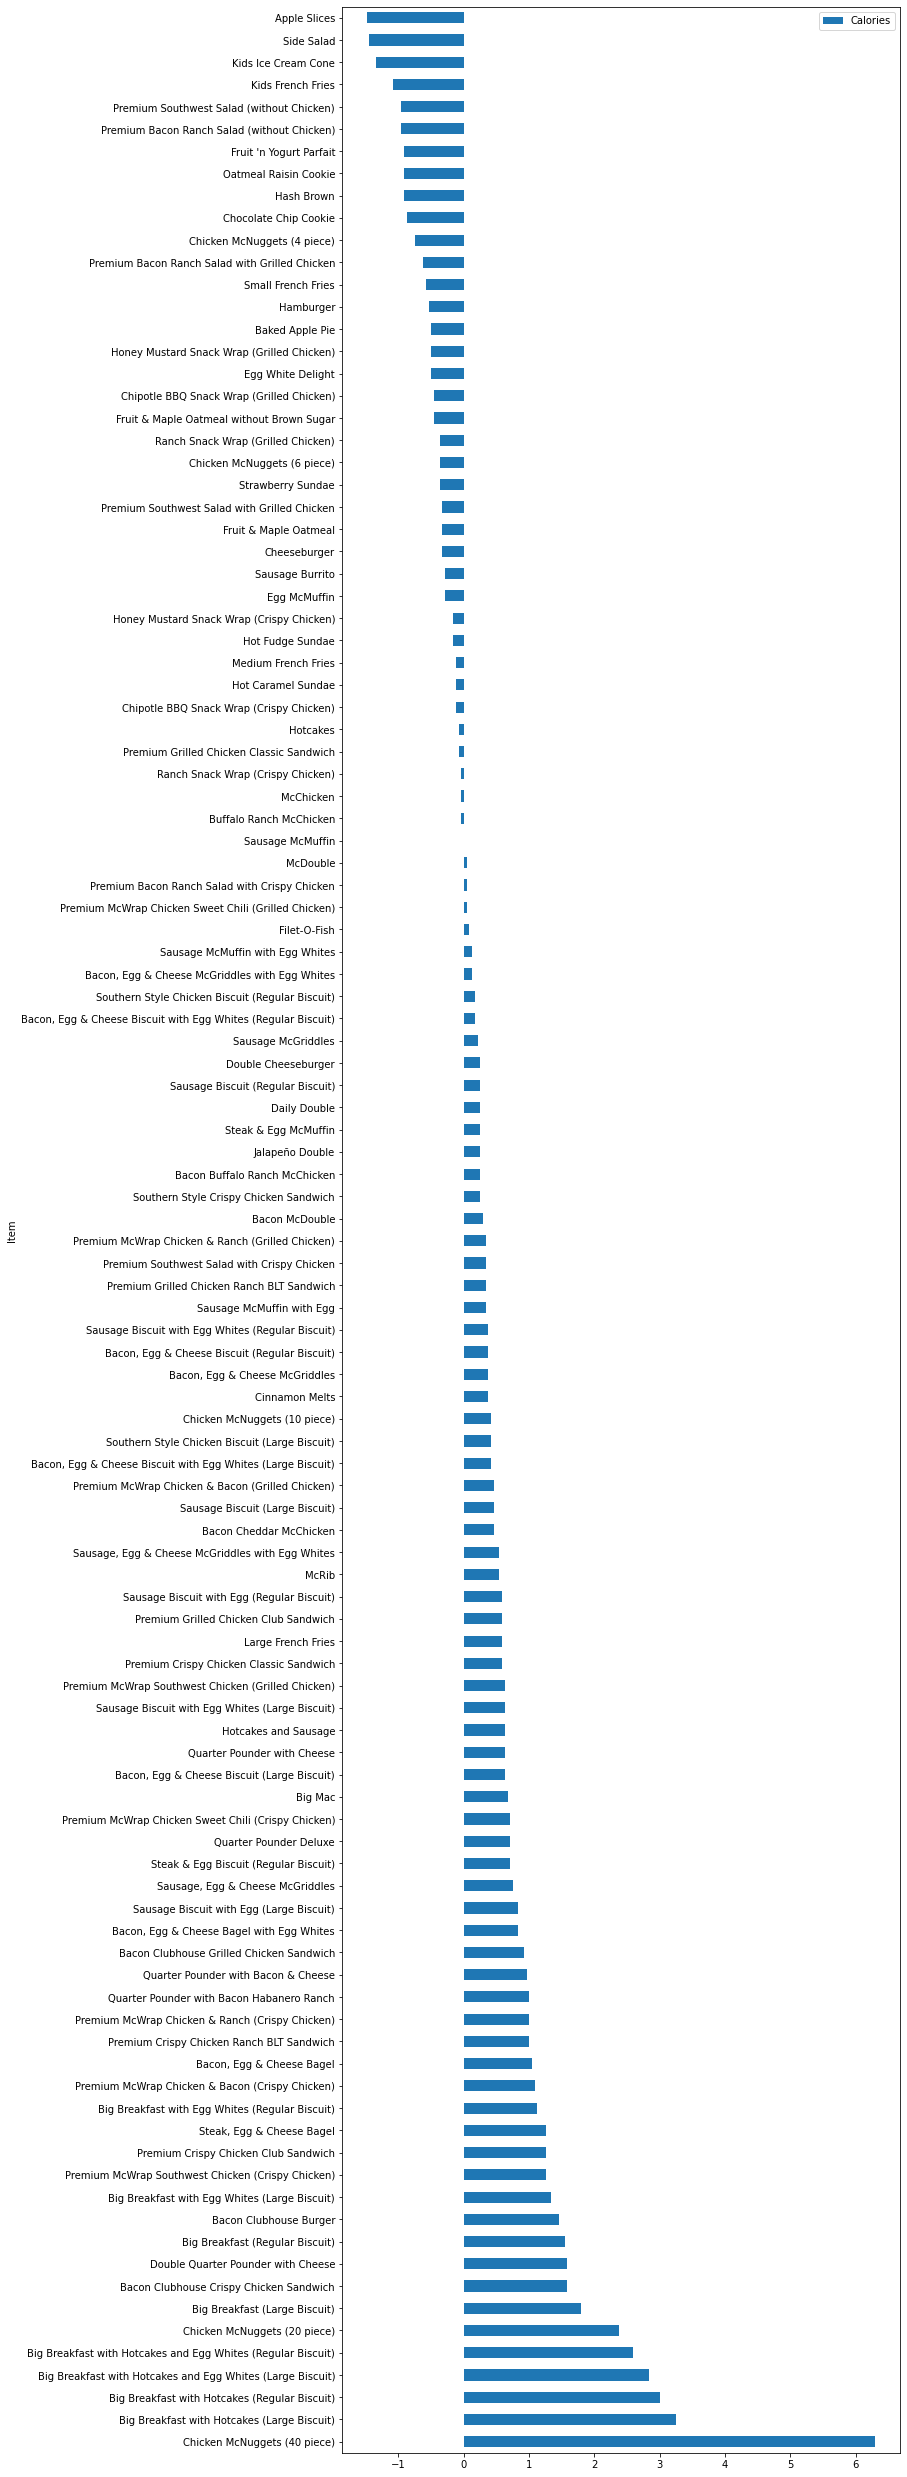

In [28]:
import matplotlib.pyplot as plt
meals = df.head(110) # All meals (without drinks) are in first 110 rows of the dataset
meals_cal = pd.DataFrame({'Item': meals.Item, 'Calories': meals.Calories}) # Select only Items and Calories columns
meals_sort = meals_cal.sort_values('Calories', ascending=False) # Sort by calories
meals_sort.plot.barh(x='Item', y='Calories', figsize= (10,45)) # Plot horizontal bar
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

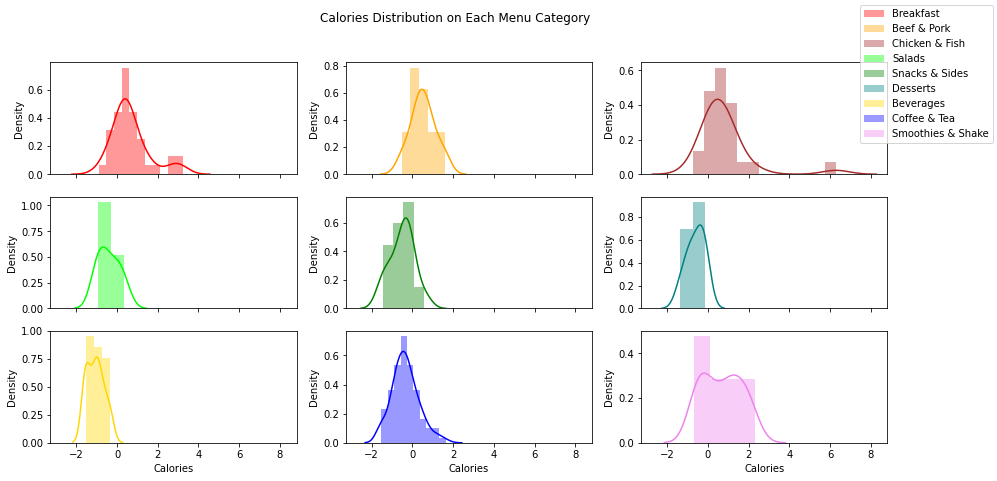

In [29]:

brkf = df.loc[df.Category == 'Breakfast']
bnp = df.loc[df.Category == 'Beef & Pork']
cnf = df.loc[df.Category == 'Chicken & Fish']
sld = df.loc[df.Category == 'Salads']
snass = df.loc[df.Category == 'Snacks & Sides']
dess = df.loc[df.Category == 'Desserts'] 
bev = df.loc[df.Category == 'Beverages']
cnt = df.loc[df.Category == 'Coffee & Tea']
ss = df.loc[df.Category == 'Smoothies & Shakes']

import seaborn as sns
# Plot calorie distribution for each category
fig, axes = plt.subplots(3, 3, figsize=(15, 7), sharex=True)
sns.color_palette("tab10")
sns.distplot( brkf["Calories"] , color='red', ax=axes[0, 0], label = "Breakfast")
sns.distplot( bnp["Calories"] , color='orange',ax=axes[0, 1], label = "Beef & Pork")
sns.distplot( cnf["Calories"] , color='brown',ax=axes[0, 2], label = "Chicken & Fish")
sns.distplot( sld["Calories"] , color='lime',ax=axes[1, 0], label = "Salads")
sns.distplot( snass["Calories"] , color='green',ax=axes[1, 1], label = "Snacks & Sides")
sns.distplot( dess["Calories"] ,  color='teal',ax=axes[1, 2], label = "Desserts")
sns.distplot( bev["Calories"] ,  color='gold',ax=axes[2, 0], label = "Beverages")
sns.distplot( cnt["Calories"] ,  color='blue',ax=axes[2, 1], label = "Coffee & Tea")
sns.distplot( ss["Calories"] ,  color='violet',ax=axes[2, 2], label = "Smoothies & Shake")
fig.suptitle("Calories Distribution on Each Menu Category")
fig.legend()
plt.show()

In [30]:
# EXPLORASI JUMLAH KALORI PADA WHITES EGG
whites = df[df['Item'].str.contains('Egg White')]
whites_cal = pd.DataFrame({'Item': whites.Item, 'Calories': whites.Calories})

# KALORI PADA WHITES EGG  - RATA-RATA
avg_whites_cal = whites.Calories.mean(axis=0)
print("CALORIES ON WHITE EGGS (AVG): ", avg_whites_cal, "Cal.")

# EXPLORASI JUMLAH KALORI PADA WHOLE EGG
whole = df[df['Item'].str.contains('Egg')] 
whole = whole[~whole['Item'].str.contains('White')]
whole_cal = pd.DataFrame({'Item': whole.Item, 'Calories': whole.Calories})

# KALORI PADA PADA WHOLE EGG - RATA-RATA
avg_whole_cal = whole.Calories.mean(axis=0)
print("CALORIES ON WHOLE EGGS (AVG): ", avg_whole_cal, "Cal.")

CALORIES ON WHITE EGGS (AVG):  0.8203915500763016 Cal.
CALORIES ON WHOLE EGGS (AVG):  0.5760082460535727 Cal.


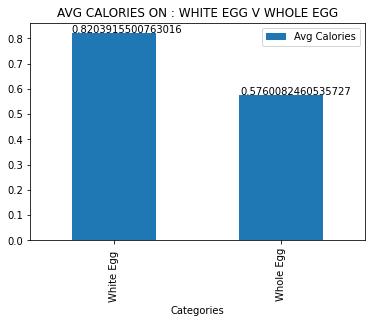

In [31]:
# VISUALISASI PADA BAR CHART

avg_egg_cal = pd.DataFrame({'Categories':['White Egg ', 'Whole Egg'], 'Avg Calories': [avg_whites_cal, avg_whole_cal]})
ax = avg_egg_cal.plot.bar(x = 'Categories', y = 'Avg Calories')
ax.set_title("AVG CALORIES ON : WHITE EGG V WHOLE EGG")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Text(0.5, 1.0, 'Calories bins')

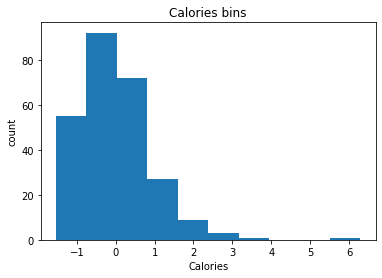

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Calories"])

# set x/y labels and plot title
plt.pyplot.xlabel("Calories")
plt.pyplot.ylabel("count")
plt.pyplot.title("Calories bins")

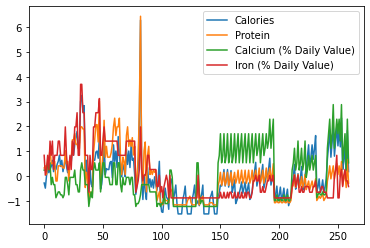

In [33]:
df.plot(kind="line")

In [34]:
df.head()

,Category,Item,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value),Calories-binned
0,Breakfast,Egg McMuffin,-0.284136,0.320453,0.236600,0.832875,Low
1,Breakfast,Egg White Delight,-0.492235,0.407971,0.236600,0.030423,Low
2,Breakfast,Sausage McMuffin,0.007203,0.057897,0.236600,0.259695,Low
3,Breakfast,Sausage McMuffin with Egg,0.340162,0.670527,0.530373,0.832875,Low
4,Breakfast,Sausage McMuffin with Egg Whites,0.132063,0.670527,0.236600,0.259695,Low


In [35]:
df["Calories"].value_counts()

-1.532732    16
 0.256923    10
-0.117656    10
-0.367375     9
-0.492235     8
             ..
 2.837354     1
-1.345442     1
 1.130940     1
 2.379536     1
 0.922840     1
Name: Calories, Length: 78, dtype: int64

Text(0.5, 1.0, 'Calories bins')

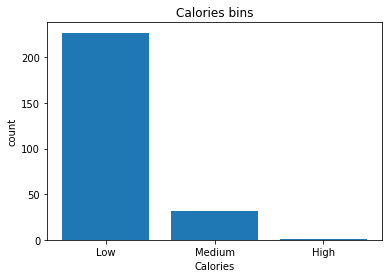

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Calories-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Calories")
plt.pyplot.ylabel("count")
plt.pyplot.title("Calories bins")

In [37]:
#@title Area Plots
df.sort_values(['Category'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5['Calories'].transpose() 

df_top5.head()

98    0.589882
90   -0.117656
91   -0.450615
92   -0.159276
93   -0.492235
Name: Calories, dtype: float64

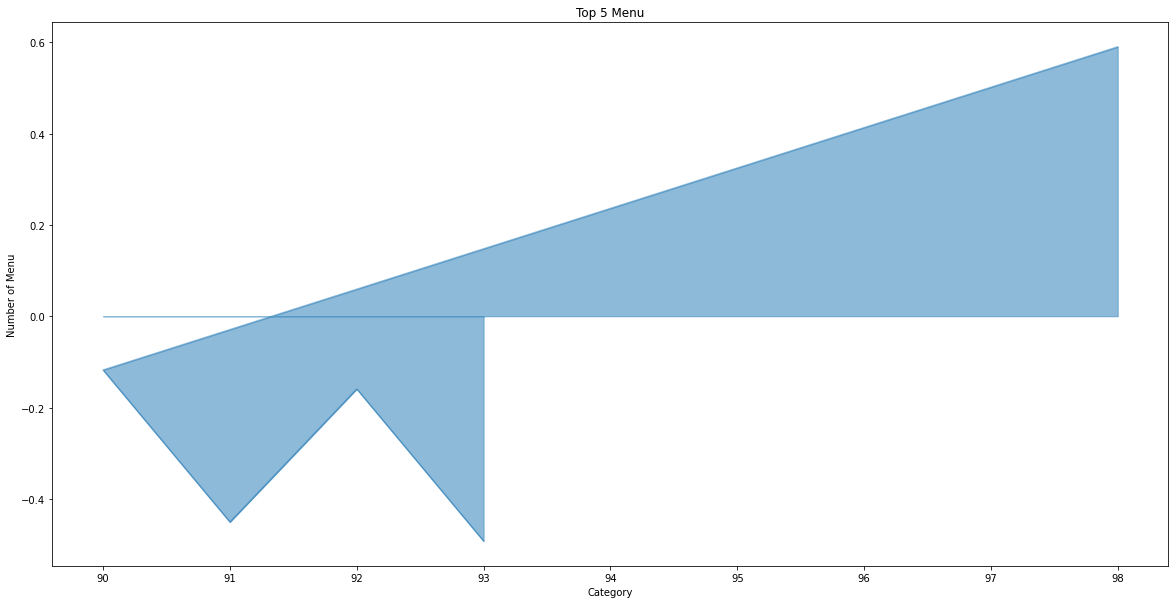

In [38]:
import matplotlib.pyplot as plt
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Top 5 Menu')
plt.ylabel('Number of Menu')
plt.xlabel('Category')

plt.show()

Text(0.5, 1.0, 'Calories bins')

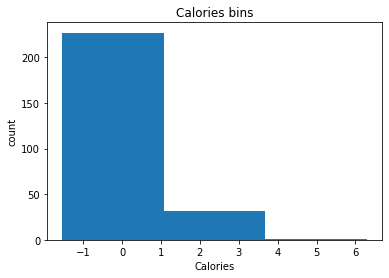

In [39]:
#@title Histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Calories"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Calories")
plt.pyplot.ylabel("count")
plt.pyplot.title("Calories bins")

In [40]:
df.head()

,Category,Item,Calories,Protein,Calcium (% Daily Value),Iron (% Daily Value),Calories-binned
98,Snacks & Sides,Large French Fries,0.589882,-0.642252,-1.114755,0.030423,Low
90,Snacks & Sides,Chipotle BBQ Snack Wrap (Crispy Chicken),-0.117656,0.057897,-0.644718,0.259695,Low
91,Snacks & Sides,Chipotle BBQ Snack Wrap (Grilled Chicken),-0.450615,0.232934,-0.644718,0.259695,Low
92,Snacks & Sides,Honey Mustard Snack Wrap (Crispy Chicken),-0.159276,0.057897,-0.644718,0.259695,Low
93,Snacks & Sides,Honey Mustard Snack Wrap (Grilled Chicken),-0.492235,0.232934,-0.644718,0.259695,Low


In [41]:
df.columns

Index(['Category', 'Item', 'Calories', 'Protein', 'Calcium (% Daily Value)',
       'Iron (% Daily Value)', 'Calories-binned'],
      dtype='object')

In [42]:
df.isnull().sum()

Category                   0
Item                       0
Calories                   0
Protein                    0
Calcium (% Daily Value)    0
Iron (% Daily Value)       0
Calories-binned            0
dtype: int64

# Specialized Visualization Tools

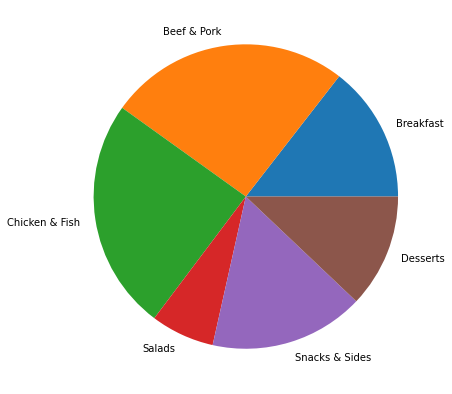

In [43]:
#@title Pie Charts
from matplotlib import pyplot as plt 
Category = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 
        'Salads', 'Snacks & Sides', 'Desserts'] 
  
Calories = [300, 530, 510, 140, 340, 250] 
  
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(Calories, labels = Category) 

# show plot 
plt.show() 

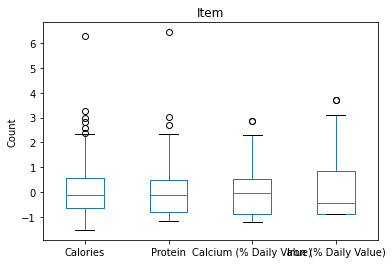

In [44]:
#@title Box Plots
import matplotlib.pyplot as plt
df.plot(kind='box')
plt.ylabel("Count")
plt.title("Item")
plt.show()

# Advanced Visualization Tools

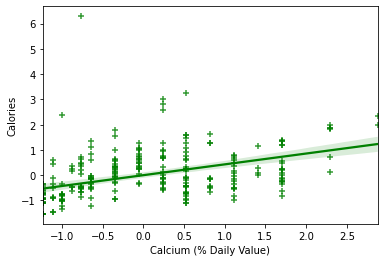

In [45]:
#@title Regression Plots with Seaborn
import seaborn as sns
ax = sns.regplot(x='Calcium (% Daily Value)', y='Calories', data=df, marker='+', color='green')